Información integrantes del equipo de trabajo

**Nombre y apellidos (Grupo):**

**Nombre y apellidos (Grupo):**

**Nombre y apellidos (Grupo):**

# Transformada de Fourier corta (SFT)


Cuando tenemos una señal con cierta periodicidad, la transformada de Fourier nos permite obtener la información de los datos, discernir señales del ruido, o incluso interpolar resultados. Sin embargo, en otros ámbitos, como es el de la industria musical, el cine, la radio, etc. las señales no se repiten indefinidamente en el tiempo (imaginar una canción, donde las notas van cambiando a lo largo del tiempo). Para este tipo de casos se suele emplear la transformada de Fourier corta (SFT por sus siglas en inglés) que representa la evolución del espectro de la señal a lo largo del tiempo.

### Apartado a:

- Considerando una frecuencia de muestreo de 44.1 KHz, definir una señal de 2 segundos que contenga varias frecuencias $\nu_i$, con distintas amplitudes cada una de ellas. Representar la señal y obtener el espectro de Fourier de dicha señal.

In [13]:
# Librerias

from numpy import loadtxt, linspace, arange, zeros, array, empty_like, cos, sin
from numpy import append as appendArray # para que no se confunda con el `append` de python
from numpy.fft import rfft
from scipy.optimize import fsolve
from scipy.io import wavfile
from pylab import plot, show, scatter, xlabel, ylabel, imshow, xlim, ylim, title
from math import pi, exp, sqrt


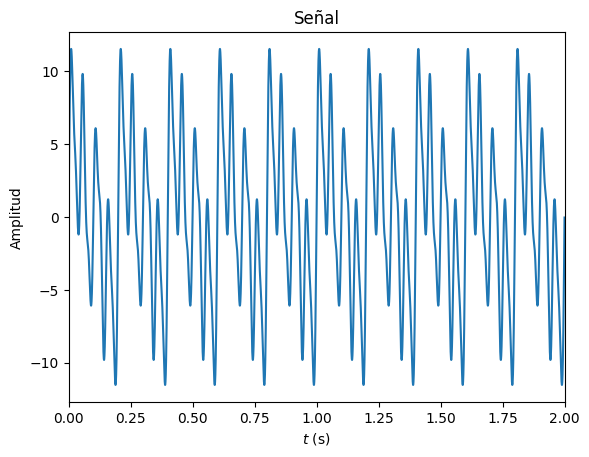

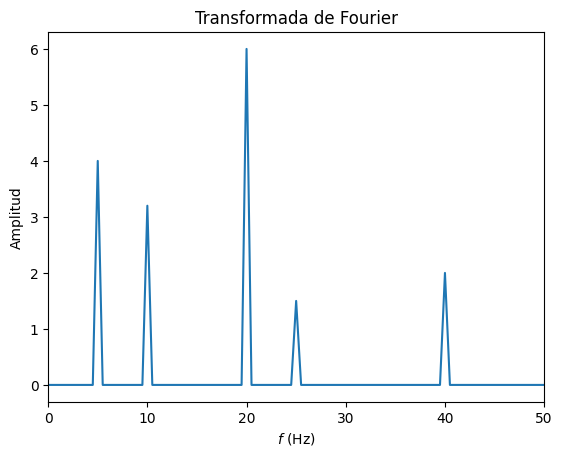

In [14]:
# constantes
muestreo = 44100
duracion = 2.0
frecuencias = array([5, 10, 20, 25, 40])
amplitudes = array([4.0, 3.2, 6.0, 1.5, 2.0])
# amplitudes = array([1.0, 2.0, 3.0, 4.0, 5.0]) # amplitudes for testing

# síntesis de la señal
t = arange(0.0, duracion, 1/muestreo)
señal = zeros(t.size)

# NOTE (MQ): con cálculo matricial es mucho más rápido
for i in range(frecuencias.size):
    señal += amplitudes[i] * sin(2*pi*frecuencias[i] * t)

# representación de la señal
plot(t, señal)
xlabel('$t$ (s)')
ylabel('Amplitud')
title('Señal')
xlim([0, duracion])
show()

# cálculo de su espectro
espectroAmplutides = rfft(señal)
espectroFrecuencias = linspace(0, señal.size//(2*duracion), int((muestreo*duracion)/2) + 1)

# representación de los coeficientes de la fft
plot(espectroFrecuencias, (1/espectroAmplutides.size)*abs(espectroAmplutides))
xlabel('$f$ (Hz)')
ylabel('Amplitud')
title('Transformada de Fourier')
xlim([0.0, 50.0])  # NOTE (MQ): la escala estaba mal. los picos deberían estar donde `frecuencias` indica, y estaban en el doble. ya está arreglado
show()


- Crear una señal de 10 segundos, donde la frecuencia de la señal varía cada 2 segundos, es decir, una señal donde tenemos 5 frecuencias y cada una de ellas sólo está presente durante 2 segundos. Representar la señal y obtener el espectro total de Fourier

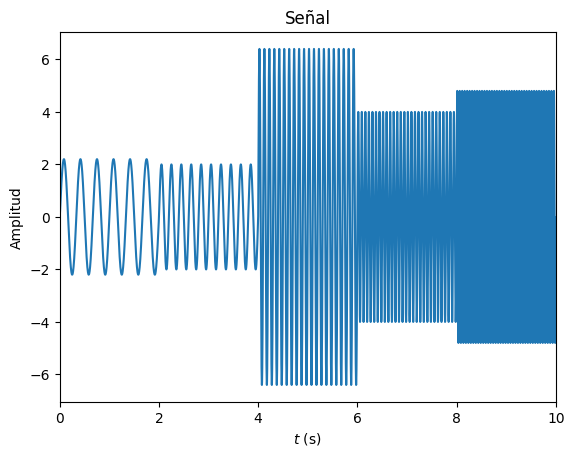

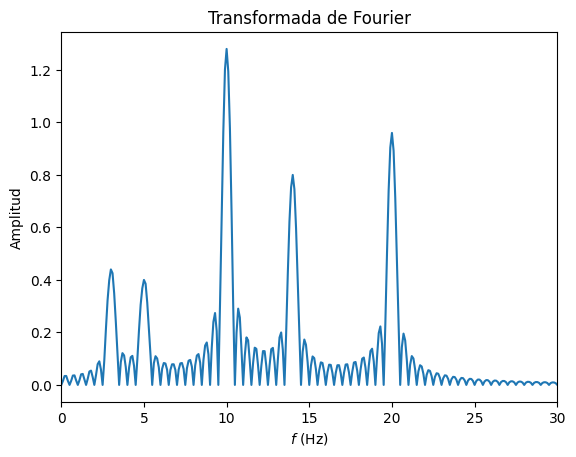

In [188]:
# constantes
duracion = 10.0
intervalo = 2.0
frecuencias = array([3, 5, 10, 14, 20])
amplitudes = array([2.2, 2, 6.4, 4.0, 4.8])
# amplitudes = array([1, 2, 3, 4, 5]) # amplitudes for testing

# síntesis de la señal
t = arange(0.0, duracion, 1/muestreo)
señal = zeros(0)  # array vacío para añadir cada segmento
N = int(t.size/(duracion/intervalo))  # cantidad de muestras de cada segmento
for i in range(frecuencias.size):
    señal = appendArray(señal, amplitudes[i] * sin(2*pi*frecuencias[i] * t[i*N:(i+1)*N]))

# representación de la señal
plot(t, señal)
xlabel('$t$ (s)')
ylabel('Amplitud')
title('Señal')
xlim([0, duracion])
show()

# cálculo de su espectro
espectroAmplutides = rfft(señal)
espectroFrecuencias = linspace(0, señal.size//(2*duracion), int((muestreo*duracion)/2) + 1)

# representación de los coeficientes de la fft
plot(espectroFrecuencias, (1/espectroAmplutides.size)*abs(espectroAmplutides))
xlabel('$f$ (Hz)')
ylabel('Amplitud')
title('Transformada de Fourier')
xlim([0.0, 30.0])
show()


Tal y como uno espera, la transformada de Fourier no distingue si una frecuencia desaparece de la señal o si perdura a lo largo de la misma. De esta manera se pierde cierta información que puede ser útil a la hora de analizar la señal, para su estudio o limpieza. Por el contrario, la SFT analiza trozos de la señal a lo largo del tiempo, de forma que se puede ver la evolución temporal de la misma.

### Apartado b:

- Definir una función SFT que tome como entrada la señal a estudiar, la frecuencia de muestreo, tamaño de los trozos a analizar (N) y cuanto se superponen las trozos que analizamos. Con esta información la función debe hacer lo siguiente:
   - Considerando el tamaño de los trozos y la superposición de los mismos, calcular el desplazamiento del segmento de trozo que analizamos
   - Calcular la cantidad de trozos que se deben analizar
   - Defina un vector (cos) del mismo tamaño que un trozo (N), cuyos elementos tomen los valores $x_i = 0.5-0.5cos(2\pi i/(N-1))$, con $i\in [0,N-1]$.
   - Cree un vector de ceros de tamaño N.
   - Definir un vector (v) de tamaño len(señal)+N, donde los N elementos finales sean cero y los primeros len(señal) sean la señal a analizar.
   - Crear un vector bidimensional de python de tipo flotante donde almacenar los resultados, es decir, con tantas filas como frecuencias vamos a tener, y tantas columnas como trozos se analizan.
   - Definir un loop que analice cada uno de los trozos, para lo cual debe realizar lo siguiente:
      - del vector v tomar el trozo de señal, de tamaño N que debemos analizar.
      - Suavizar los bordes del trozo usando el vector cos.
      - definimos un vector (datos) donde guardamos el trozo suavizado y a continuación N ceros.
      - Calculamos el espectro de Fourier
      - Guardamos en la columna correspondiente al trozo estudiado del vector resultados la primera mitad del espectro obtenido.
   - La función debe devolver el vector de resultados.
- Usando la función anterior, analizar y representar la evolución del espectro a lo largo del tiempo para la señal de 10 segundos de duración creada en los apartados anteriores. **AYUDA** El gráfico debe hacerse con imshow.

In [4]:
def sft(g,f,N,sup):
    #sup es la cantidad de los datos de un trozo con tamaño (N) que están superpuestos con otro trozo
    #de modo que el desplazamiento que debe haber desde que empieza un trozo hasta que empieza el siguiente debe ser
    desplazamiento = N-sup/2  #el /2 es debido a que (sup) representa los datos del trozo superpuestos a ambos lados, pero solo nos interesa los de uno de los lados
    # por tanto ahora se puede calcular el numero de trozos que debemos hacer de nuestra señal
    Numero = int(len(g)/desplazamiento)  #aún así el tamaño de un trozo seguirá siendo (N)
    cosvect = []
    for i in range(N-1):
        cosvect.append(0.5-0.5*cos(2*pi*i/(N-1))) 
    ceros = zeros(N)
    v = [g,ceros]
    
    Data = zeros([20000,N],float)   #no entiendo muy bien todavía lo de tantas filas como frecuencias vamos a tener
    #por si acaso he puesto 20000 porque 20000 Hz es el límite humano más o menos. (triplazo)
    #aqui he ido haciendo un poco lo que te dice pero me he plantado porque no entiendo lo del vector bidimensional

    return

- Usando la función SFT, analizar la señal contenida en el archivo `pista1.wav` que se carga a continuación y representar la SFT para la señal.

In [2]:
import IPython.display as ipd #Librerias para leer archivos de audio
from scipy.io import wavfile    #esta también funciona de scipy
import librosa
import librosa.display

señal, frec_muestreo = librosa.load("pista1.wav")

ModuleNotFoundError: No module named 'librosa'

In [7]:
#Para escuchar el audio
ipd.Audio(señal,rate=frec_muestreo)

In [ ]:
freqoriginal, data = wavfile.read('pista1.wav')     #data es un array de numpy con los datos, en este caso es estéreo (me parece)
freqnueva = 44100
duracion = len(data[:,0])/freqoriginal
print("el archivo dura ",duracion, " segundos")
print("el archivo dura ",int(duracion/60-duracion%60/60), " minuto y", (duracion%60), " segundos")

print(freqoriginal)
xlim(0,1500000)         #zoom en la primera parte del audio (melodía rápida)
plot(data)
show()
datafft = rfft(data[:,0])
# plot(datafft)
# show()
# print(datafft.size)
# print(data.size)

### Apartado c:

- Viendo el espectro a lo largo del tiempo, añadir a la señal anterior "ruido" con frecuencia muy alta (o muy baja) y volver a analizar la señal resultante. **AYUDA**: usar una amplitud del orden de 0.1 para el "ruido"

In [ ]:
#otro cambio

En muchas situaciones, pueden producirse estos ruidos indeseados. Según la situación en la que nos encontremos puede procederse de dos formas: En caso de haber ruido en los datos, se suelen aplicar filtro, es decir, se eliminan aquellas frecuencias molestas del espectro y se utiliza la transformada de Fourier inversa para recuperar la señal limpia. Otras veces, por ejemplo al escuchar música con unos auriculares, el ruido es ajeno al dispositivo. Sin embargo, hoy en día somos capaces de analizar dicho ruido (mediante el micrófono por ejemplo) y hacer que la señal emitida incluya una componente que anula el ruido ambiente.

- Haced la transformada de Fourier de la señal completa (incluido el ruido), aplicad un filtro (el que convenga según la situación) para eliminar el ruido (considerad que lo habéis construido vosotros y tenéis información del mismo). Para construir el filtro, definid un vector del mismo tamaño que la TF que tome valores 0 ó 1 según si las frecuencias queremos eliminarlas o no. Una vez limpiada la señal, volved a calcular la SFT y comprobad que se recupera el resultado original de la señal.

**EXTRA** Usando los primeros 10 segundos de la señal con ruido, cread una señal que cancele el ruido para el resto de la señal. Añadirlo a la señal con el ruido y volved a representar la SFT

In [ ]:
#EL PUTO MIGUEL ES QUE ES UN PINPINELA DE MUCHO CUIDAO